In [1]:
library("ggplot2") 
library("reshape2")
library("reshape")
 
rawCount = read.table("../name.txt", header = TRUE, row.names = 1)
head(rawCount) #必ず毎回確認
colnames(rawCount) <- c("xrp1-OE1","xrp1-OE2","control1","control2") #rename

head(rawCount) #必ず毎回確認
artificialCount = log2(rawCount + 1) 
head(artificialCount) #必ず毎回確認
ggplot(artificialCount, aes(x = WT1_1)) + 
ylab(expression(log[2](count + 1))) + 
geom_histogram(colour = "white", fill = "#525252", binwidth = 0.4) 


Attaching package: ‘reshape’


The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast




,xrp1_OE1.SRR23932125.bam,xrp1_OE2.SRR23932126.bam,control1.SRR23932127.bam,control2.SRR23932128.bam
,<int>,<int>,<int>,<int>
cac,98,167,8,35
Cngl,24,13,7,11
CG11836,436,585,380,485
CG33096,85,113,102,143
bam,18,49,20,31
sisRNA:CR46364,147,167,120,92


,xrp1-OE1,xrp1-OE2,control1,control2
,<int>,<int>,<int>,<int>
cac,98,167,8,35
Cngl,24,13,7,11
CG11836,436,585,380,485
CG33096,85,113,102,143
bam,18,49,20,31
sisRNA:CR46364,147,167,120,92


,xrp1-OE1,xrp1-OE2,control1,control2
,<dbl>,<dbl>,<dbl>,<dbl>
cac,6.629357,7.392317,3.169925,5.169925
Cngl,4.643856,3.807355,3.000000,3.584963
CG11836,8.771489,9.194757,8.573647,8.924813
CG33096,6.426265,6.832890,6.686501,7.169925
bam,4.247928,5.643856,4.392317,5.000000
sisRNA:CR46364,7.209453,7.392317,6.918863,6.539159


ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'WT1_1' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_hand

Loading required package: limma



[1] 17137     4

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
Cyp4p2,-12.453012,6.511032,0,0
Ilp8,-12.280491,8.751890,0,0
Cyp12c1,-10.644465,6.052086,0,0
Spn100A,8.141374,6.740792,0,0
CG14960,-7.757599,5.496073,0,0
CG15784,-5.632429,8.407028,0,0
Swim,-5.573658,6.327147,0,0
GstE6,-4.877646,6.046548,0,0
CG6287,4.370016,7.145335,0,0


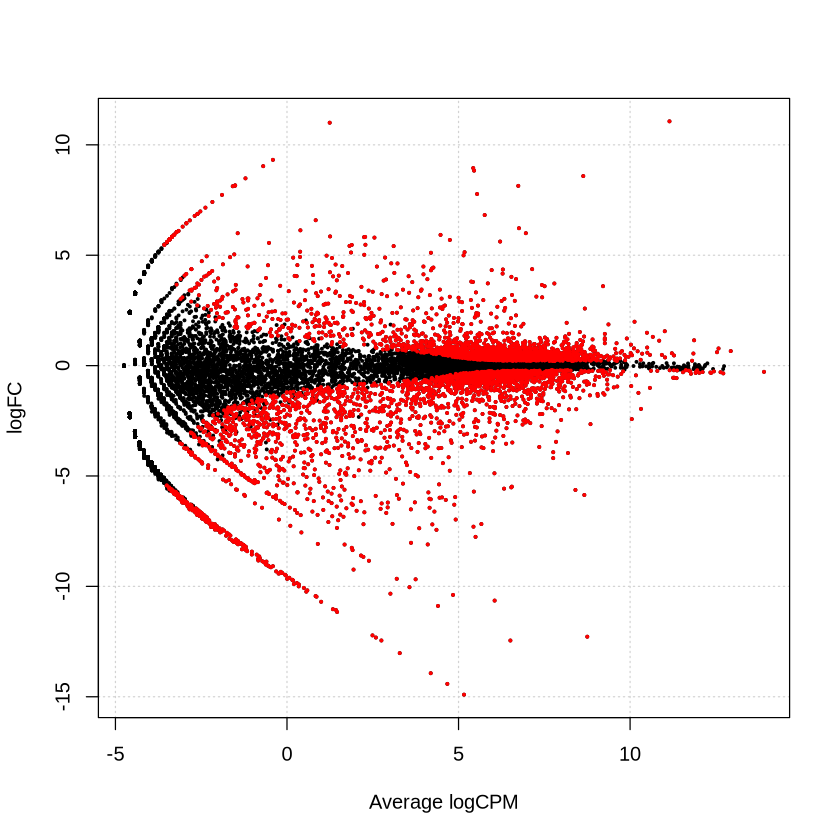

In [2]:
library("edgeR") 
count <- as.matrix(rawCount) 
dim(count)
group <- factor(c("MT", "MT","WT", "WT")) 
d <- DGEList(counts = count, group = group)
d <- calcNormFactors(d)  #全遺伝子commonの分散を計算
d <- estimateCommonDisp(d) #moderated tagwise dispersionの計算）
d <- estimateTagwiseDisp(d) #exact test
result <- exactTest(d)　
topTags(result)
table <- as.data.frame(topTags(result, n = nrow(count))) #toptagsで全行指定してデータフレームに変換
is.DEG <- as.logical(table$FDR < 0.05) #logical クラス(true、false)に判定付きで変換。
DEG.names <- rownames(table)[is.DEG] #trueだけDEG.namesに収納 
plotSmear(result, de.tags = DEG.names, cex=0.3)

In [3]:
write.table(table, file = "result_name.txt", col.names = T, row.names = T, sep = " ", quote = F) #データを出力する。

#FDR<=0.01だけ取り出す
FDRThreshold <- table$FDR <= 0.01
significant <- table[FDRThreshold,]
head(significant) #確認
write.table(significant, file = "significant_name.txt", col.names = T, row.names = T, sep = ",", quote = F) #FDR<=0.01を保存

#誘導遺伝子を抽出
induction <- significant[(significant$logFC >= 0),] #誘導
head(induction) #確認
write.table(induction, file = "induction_name.txt", col.names = T, row.names = T, sep=",", quote = F) #保存

#抑制遺伝子を抽出
repression <- significant[(significant$logFC < 0),] #抑制
head(repression) #確認
write.table(repression, file = "repression_name.txt", col.names = T, row.names = T, sep = ",", quote = F) #保存

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
Cyp4p2,-12.453012,6.511032,0,0
Ilp8,-12.280491,8.751890,0,0
Cyp12c1,-10.644465,6.052086,0,0
Spn100A,8.141374,6.740792,0,0
CG14960,-7.757599,5.496073,0,0
CG15784,-5.632429,8.407028,0,0


,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
Spn100A,8.141374,6.740792,0.000000e+00,0.000000e+00
CG6287,4.370016,7.145335,0.000000e+00,0.000000e+00
Spn43Aa,8.585980,8.634799,9.079269e-305,1.296595e-301
Eip78C,8.832309,5.452887,8.348113e-296,9.537440e-293
CG10960,5.619493,6.212314,4.906664e-286,5.255343e-283
wbl,5.999259,6.961972,2.572377e-279,2.593108e-276


,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
Cyp4p2,-12.453012,6.511032,0,0
Ilp8,-12.280491,8.751890,0,0
Cyp12c1,-10.644465,6.052086,0,0
CG14960,-7.757599,5.496073,0,0
CG15784,-5.632429,8.407028,0,0
Swim,-5.573658,6.327147,0,0
